<a href="https://colab.research.google.com/github/astefano/CF_XAI/blob/main/sea_level_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving epa-sea-level.csv to epa-sea-level.csv


In [59]:
df = pd.read_csv('epa-sea-level.csv')

In [50]:
df.size

670

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


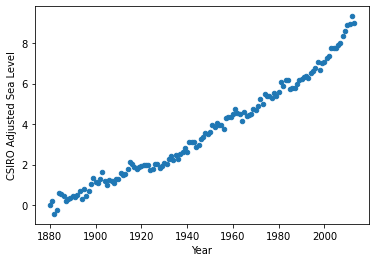

In [5]:
df.plot(kind='scatter', x="Year", y='CSIRO Adjusted Sea Level')
plt.show()

In [6]:
from scipy.stats import linregress

In [60]:
X = df['Year']
y = df['CSIRO Adjusted Sea Level']

In [34]:
print(X)

120    2000
121    2001
122    2002
123    2003
124    2004
125    2005
126    2006
127    2007
128    2008
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64


In [61]:
res = linregress(X, y)

In [19]:
print(type(X))

<class 'pandas.core.series.Series'>


In [62]:
def prediction(year):
  return res.intercept + res.slope*year

In [54]:
prediction(2050)

10.175455257136548

In [64]:
filtered_df = df[df['Year']>=2000]
filtered_X = filtered_df['Year']
filtered_y = filtered_df['CSIRO Adjusted Sea Level']
res2 = linregress(filtered_X, filtered_y)

In [65]:
def prediction2(year):
  return res2.intercept + res2.slope*year

In [66]:
prediction2(2050)

15.382443524364874

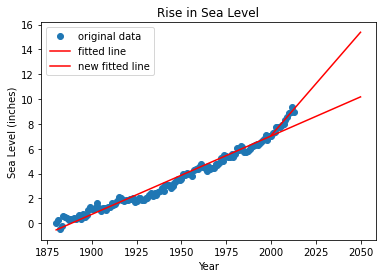

In [67]:
plt.plot(X, y, 'o', label='original data')
extended_X = X.append(pd.Series(list(range(2013, 2051))))
plt.plot(extended_X, res.intercept + res.slope*extended_X, 'r', label='fitted line')
extended_filtered_X = filtered_X.append(pd.Series(list(range(2013, 2051))))
plt.plot(extended_filtered_X, res2.intercept + res2.slope*extended_filtered_X, 'r', label='new fitted line')
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.legend()
plt.show()